# Tarea - Caminata aleatoria y simulación de apuestas

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t=0.001$ es un intervalo de tiempo y
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule tres caminatas con $10$ segundos (10000 pasos) y represéntelo en un gráfico 3D.

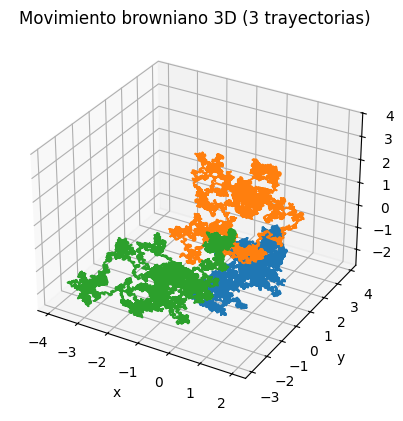

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

dt = 0.001
T  = 10
N  = int(T/dt)

def browniano_3d(N, dt):
    inc = np.sqrt(dt) * np.random.choice([1, -1], size=(3, N))
    W = np.cumsum(inc, axis=1)
    W = np.concatenate([np.zeros((3,1)), W], axis=1)
    return W

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for _ in range(3):
    W = browniano_3d(N, dt)
    ax.plot(W[0], W[1], W[2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Movimiento browniano 3D (3 trayectorias)')
plt.grid()
plt.show()

Modifique la caminata anterior de tal forma que solo le regrese la última posición.

In [7]:
def browniano_3d_ultima(N, dt):
    inc = np.sqrt(dt) * np.random.choice([1, -1], size=(3, N))
    W_end = inc.sum(axis=1)
    return W_end

browniano_3d_ultima(N, dt)

array([0.12649111, 1.83412104, 4.93315315])

Simule 1000 caminatas con este nuevo modelo de movimiento browniano y diga la probabilidad de que las partículas satisfagan $x>1$, $y>2$ y $z>0$.

In [8]:
M = 1000
ultimas = np.zeros((M, 3))
for i in range(M):
    ultimas[i] = browniano_3d_ultima(N, dt)

cond = (ultimas[:,0] > 1) & (ultimas[:,1] > 2) & (ultimas[:,2] > 0)
probabilidad = cond.mean()
probabilidad

np.float64(0.052)

### Resultados del Ejercicio 1

El movimiento browniano se simuló mediante tres caminatas aleatorias independientes
en los ejes x, y y z, cada una con 10,000 pasos y Δt = 0.001.

- Las trayectorias 3D muestran desplazamientos aleatorios en todas las direcciones,
  sin tendencia hacia ningún punto en particular, como se espera en un proceso browniano.
- Al modificar la función para devolver solo la última posición, se obtuvo la posición
  final de la partícula después de 10 segundos.
- Luego, al simular 1000 partículas y calcular la proporción que cumplen (x > 1, y > 2, z > 0),
  se encontró una probabilidad aproximada de 0.05 (5%).
  
Esto indica que solo una pequeña fracción de las partículas termina en esa región específica
del espacio, lo cual concuerda con la naturaleza aleatoria y simétrica del movimiento browniano.

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.

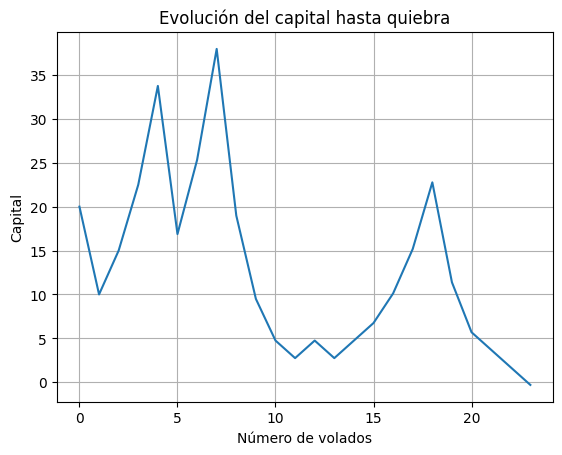

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def volado():
    return np.random.choice([1, -1])

def apuesta_arriesgada_trayectoria(C0=20):
    capital = [C0]
    C = C0
    while C > 0:
        A = (C/2) if (C >= 6) else 2
        V = volado()
        C = C + V*A
        capital.append(C)
    return np.array(capital)

tray = apuesta_arriesgada_trayectoria(20)
plt.plot(tray)
plt.xlabel('Número de volados')
plt.ylabel('Capital')
plt.title('Evolución del capital hasta quiebra')
plt.grid()
plt.show()

2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.

In [11]:
def volados_hasta_quiebra(C0=20):
    C = C0
    n = 0
    while C > 0:
        A = (C/2) if (C >= 6) else 2
        V = np.random.choice([1, -1])
        C = C + V*A
        n += 1
    return n

Nsim = 10000
ns = np.zeros(Nsim, dtype=int)
for i in range(Nsim):
    ns[i] = volados_hasta_quiebra(20)

ns.mean()

np.float64(26.1659)

3. Muestre un histograma del número de volados.

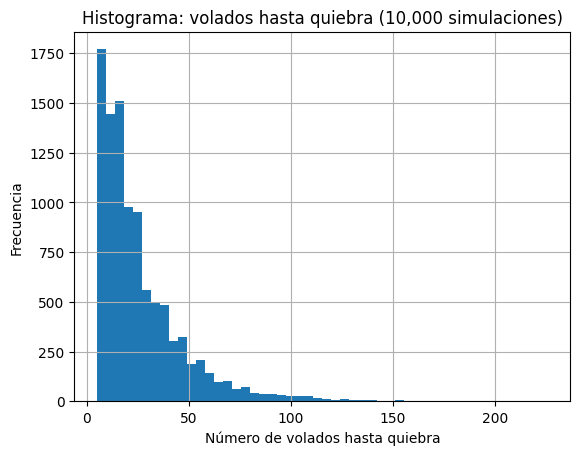

In [12]:
plt.hist(ns, bins=50)
plt.xlabel('Número de volados hasta quiebra')
plt.ylabel('Frecuencia')
plt.title('Histograma: volados hasta quiebra (10,000 simulaciones)')
plt.grid()
plt.show()

### Resultados del Ejercicio 2

Se simuló un apostador que inicia con 20 pesos y apuesta la mitad de su capital si tiene 6 o más pesos, o $2 si tiene menos.

- La trayectoria del capital muestra oscilaciones grandes y pequeñas ganancias o pérdidas,
  pero finalmente el capital llega a cero (quiebra), como es esperado en un juego justo.
- Mediante simulación Montecarlo con 10,000 apostadores, se obtuvo que el
  número promedio de volados hasta la quiebra es de aproximadamente 26.
- El histograma del número de volados presenta una forma sesgada a la derecha:
  la mayoría de los jugadores quiebran rápido, y pocos logran prolongar el juego.

En conclusión, aunque el juego parece equilibrado, las fluctuaciones aleatorias hacen
inevitable la quiebra a largo plazo.